# Black Oil PVT: Sol GOR Models

## Importing the required libraries

In [2]:
import pandas as pd
import missingno as mno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Incluidng training datatset

In [3]:
df = pd.read_excel(#########\ML_model_pvt_training_data\cmg model test\training data GOR removed Goldie 1 BHS\Training_data_GOR_cmg.xlsx")

In [4]:
df

,p,Rs,Bo,Oil_dens,Deviation factor Z,Temp_F,Gas_spgr
0,13015.0,440.0,1.247,0.7580,0.000,251.6,0.000
1,10990.0,440.0,1.261,0.7500,0.000,251.6,0.000
2,8999.0,440.0,1.278,0.7400,0.000,251.6,0.000
3,6994.0,440.0,1.299,0.7280,0.000,251.6,0.000
4,5999.0,440.0,1.311,0.7210,0.000,251.6,0.000
...,...,...,...,...,...,...,...
277,900.0,334.0,1.255,0.7364,0.903,186.8,0.826
278,500.0,230.0,1.208,0.7482,0.942,186.8,0.900
279,200.0,137.0,1.161,0.7598,0.975,186.8,1.063
280,90.0,93.0,1.135,0.7663,0.988,186.8,1.261


# Data pre-processing

In [5]:
df.dropna(inplace = True)

In [105]:
df

,p,Rs,Bo,Oil_dens,Deviation factor Z,Temp_F,Gas_spgr
0,13015.0,440.0,1.247,0.7580,0.000,251.6,0.000
1,10990.0,440.0,1.261,0.7500,0.000,251.6,0.000
2,8999.0,440.0,1.278,0.7400,0.000,251.6,0.000
3,6994.0,440.0,1.299,0.7280,0.000,251.6,0.000
4,5999.0,440.0,1.311,0.7210,0.000,251.6,0.000
...,...,...,...,...,...,...,...
277,900.0,334.0,1.255,0.7364,0.903,186.8,0.826
278,500.0,230.0,1.208,0.7482,0.942,186.8,0.900
279,200.0,137.0,1.161,0.7598,0.975,186.8,1.063
280,90.0,93.0,1.135,0.7663,0.988,186.8,1.261


In [7]:
df.describe()

,p,Rs,Bo,Oil_dens,Deviation factor Z,Temp_F,Gas_spgr
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,1566.119662,380.886096,1.255134,0.743413,0.716408,168.801277,0.654748
std,1615.289414,313.571417,0.166813,0.065593,0.384306,42.404965,0.441240
min,0.000000,0.000000,1.013200,0.614800,0.000000,100.000000,0.000000
25%,462.500000,154.150000,1.120250,0.698250,0.818000,131.000000,0.566250
50%,1200.000000,327.000000,1.239000,0.737000,0.896000,170.000000,0.688500
75%,2200.000000,506.500000,1.346000,0.777150,0.953750,186.800000,0.815750
max,13015.000000,1422.000000,1.837000,0.955300,1.020000,257.000000,2.780000


# Correlation coefficients for feature selection: Pearson for linear correlation

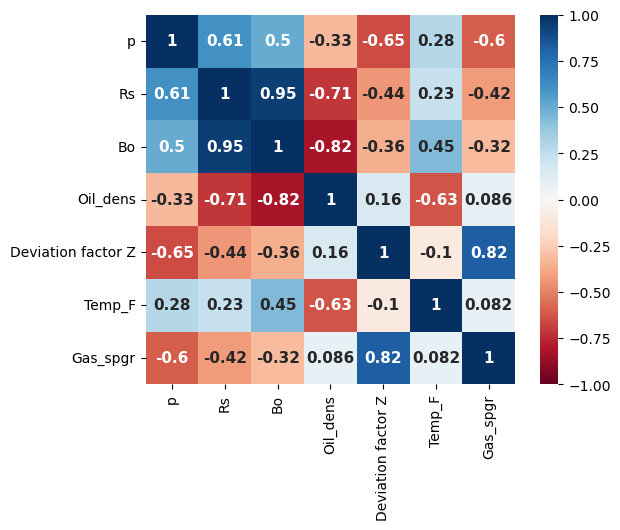

In [8]:
corr = df.corr(method = 'pearson')

#plt.figure(figsize = (15,15))
plt.figure()
h_map = sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})

# Correlation coefficients for feature selection: Spearman for non-linear correlation

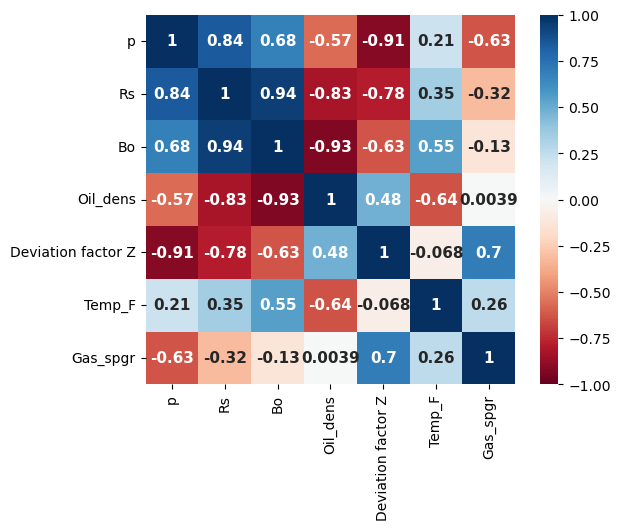

In [9]:
corr = df.corr(method = "spearman")

#plt.figure(figsize = (15,15))
plt.figure()
h_map = sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, annot = True, square = True,
            annot_kws = {'fontsize': 11, 'fontweight':'bold'})

In [12]:
df.columns

Index(['p', 'Rs', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr'],
      dtype='object')

# Train parameter and target selection

In [13]:
X = df[['p', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr']]
y = df['Rs']

# X = df[['Rs_SCF/STB', 'Oil_dens_g/cc', 'Temp_F']]
# y = df['Oil_FVF']

In [14]:
X

,p,Bo,Oil_dens,Deviation factor Z,Temp_F,Gas_spgr
0,13015.0,1.247,0.7580,0.000,251.6,0.000
1,10990.0,1.261,0.7500,0.000,251.6,0.000
2,8999.0,1.278,0.7400,0.000,251.6,0.000
3,6994.0,1.299,0.7280,0.000,251.6,0.000
4,5999.0,1.311,0.7210,0.000,251.6,0.000
...,...,...,...,...,...,...
277,900.0,1.255,0.7364,0.903,186.8,0.826
278,500.0,1.208,0.7482,0.942,186.8,0.900
279,200.0,1.161,0.7598,0.975,186.8,1.063
280,90.0,1.135,0.7663,0.988,186.8,1.261


# Train-Test split 

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Model 1 Linear Regression

In [16]:
regl = LinearRegression(fit_intercept=True)
regl.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred1 = regl.predict(X_val)

In [18]:
r2_linear = metrics.r2_score(y_val,y_pred1)  # random forest regression
r2_linear

0.9371067373354842

# Model 2 Random Forest Regressor 

In [19]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
y_pred2 = regr.predict(X_val)

In [21]:
r2_forest = metrics.r2_score(y_val,y_pred2)  # random forest regression
r2_forest

0.9738352136924686

# Model 3 AdaBoost Regressor

In [22]:
reg_ada = AdaBoostRegressor()
reg_ada.fit(X_train, y_train)

AdaBoostRegressor()

In [23]:
y_pred3 = reg_ada.predict(X_val)
r2_ada = metrics.r2_score(y_val,y_pred3)  # random forest regression
r2_ada

0.953820420276261

# Model 4 Gradient Boost Regressor

In [24]:
reg_gb = GradientBoostingRegressor()
reg_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [25]:
y_pred4 = reg_gb.predict(X_val)
r2_gb = metrics.r2_score(y_val,y_pred4)  # random forest regression
r2_gb

0.9797489757485367

# Neural network: MLP regressor

In [183]:
from sklearn.neural_network import MLPRegressor

reg_MLP = MLPRegressor(hidden_layer_sizes = 500,activation = 'identity',solver = 'lbfgs', max_iter = 500)
reg_MLP.fit(X_train, y_train)
y_predNN = reg_MLP.predict(X_val)
r2_MLP = metrics.r2_score(y_val,y_predNN)  # random forest regression
r2_MLP

0.9317923657592112

# Hyperparameter optimization

In [185]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Number of features to consider at every split
# max_features = ['auto', 'sqrt','log2']
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8,10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'random_state':[None,42],
    'max_leaf_nodes':[None,2,10,20,30],
    'criterion':["squared_error", "absolute_error", "poisson"]}

print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [2, 5, 8, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'random_state': [None, 42], 'max_leaf_nodes': [None, 2, 10, 20, 30], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [191]:
from sklearn.model_selection import GridSearchCV

LR_rf = {'n_estimators':[100,200,300],
    'criterion':["squared_error", "absolute_error"],
    'max_depth':[3],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2,3],
    'min_weight_fraction_leaf':[0.0],
    'max_features':["auto", "sqrt"],
    'max_leaf_nodes':[None,2,10],
    'min_impurity_decrease':[0.0],
    'bootstrap':[True],
    'oob_score':[False],
    'n_jobs':[-1],
    'random_state':[42],
    'verbose':[1],
    'warm_start':[False],
    'ccp_alpha':[0.0],
    'max_samples':[None]}
tuning = GridSearchCV(estimator = RandomForestRegressor(), param_grid = LR_rf, scoring = "r2", n_jobs = -1, 
                      verbose = 1, cv = 2)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_


Fitting 2 folds for each of 324 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.3s finished


({'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 300,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': 42,
  'verbose': 1,
  'warm_start': False},
 0.9472946228278141)

# Model evaluation on Validation data or Test data split

In [102]:
me_lin1 = metrics.max_error(y_val, y_pred1)  # linnear regression
print("MaxEr_lin: ", round(me_lin1,2))
me_rf1 = metrics.max_error(y_val, y_pred2)  # random forest regressor
print("MaxEr_rf: ", round(me_rf1,2))
me_ada1 = metrics.max_error(y_val, y_pred3)  # Ada Boost regression
print("MaxEr_ada: ", round(me_ada1,2))
me_gb1 = metrics.max_error(y_val, y_pred4)  # Gradient boost
print("MaxEr_gb: ", round(me_gb1,2))
########################################################
mae_lin1 = metrics.mean_absolute_error(y_val, y_pred1)  # linnear regression
print("MAE_lin: ", round(mae_lin1,2))
mae_rf1 = metrics.mean_absolute_error(y_val, y_pred2)  # random forest regressor
print("MAE_rf: ", round(mae_rf1,2))
mae_ada1 = metrics.mean_absolute_error(y_val, y_pred3)  # Ada Boost regression
print("MAE_ada: ", round(mae_ada1,2))
mae_gb1 = metrics.mean_absolute_error(y_val, y_pred4)  # Gradient boost
print("MAE_gb: ", round(mae_gb1,2))
#########################################################
mse_lin1 = metrics.mean_squared_error(y_val, y_pred1)  # linnear regression
print("MSE_lin: ", round(mse_lin1,2))
mse_rf1 = metrics.mean_squared_error(y_val, y_pred2)  # random forest regressor
print("MSE_rf: ", round(mse_rf1,2))
mse_ada1 = metrics.mean_squared_error(y_val, y_pred3)  # Ada Boost regression
print("MSE_ada: ", round(mse_ada1,2))
mse_gb1 = metrics.mean_squared_error(y_val, y_pred4)  # Gradient boost
print("MSE_gb: ", round(mse_gb1,2))
########################################################
rmse_lin1 = mse_lin1**(1/2)
print("RMSE_lin: ", round(rmse_lin1,2))
rmse_rf1 = mse_rf1**(1/2)
print("RMSE_rf: ", round(rmse_rf1,2))
rmse_ada1 = mse_ada1**(1/2)
print("RMSE_ada: ", round(rmse_ada1,2))
rmse_gb1 = mse_gb1**(1/2)
print("RMSE_gb: ", round(rmse_gb1,2))
#######################################################
# mape_lin1 = metrics.mean_absolute_percentage_error(y_val, y_pred1) # linear regression
# print("MAPE Linear Regression: ",round(mape_lin1,2))
# mape_rf1 = metrics.mean_absolute_percentage_error(y_val, y_pred2) # random forest regressor
# print("MAPE Random forest regressor: ",round(mape_rf1,2))
# mape_ada1 = metrics.mean_absolute_percentage_error(y_val, y_pred3) # ada boost regressor
# print("MAPE Ada Boost Regressor: ",round(mape_ada1,2))
# mape_gb1 = metrics.mean_absolute_percentage_error(y_val, y_pred4) # Gradient boost regressor
# print("MAPE Gradient Boost Regressor: ",round(mape_gb1,2))

# multiple zero values therefore extremely high MAPE
########################################################
r2_lin1 = metrics.r2_score(y_val,y_pred1)  # Linear regression
print("R2-Score Linear Regression: ",round(r2_lin1,2))
r2_rf1 = metrics.r2_score(y_val,y_pred2)  # Random forest regressor
print("R2-Score Random Forest Regressor: ",round(r2_rf1,2))
r2_ada1 = metrics.r2_score(y_val,y_pred3)  # AdaBoost regressor
print("R2-Score Ada Boost Regressor: ",round(r2_ada1,2))
r2_gb1 = metrics.r2_score(y_val,y_pred4)  # GradientBoost regression
print("R2-Score Gradient Boost Regressor: ",round(r2_gb1,2))




MaxEr_lin:  370.08
MaxEr_rf:  167.01
MaxEr_ada:  155.97
MaxEr_gb:  126.19
MAE_lin:  45.4
MAE_rf:  30.95
MAE_ada:  49.75
MAE_gb:  27.97
MSE_lin:  5230.72
MSE_rf:  2176.08
MSE_ada:  3840.68
MSE_gb:  1684.24
RMSE_lin:  72.32
RMSE_rf:  46.65
RMSE_ada:  61.97
RMSE_gb:  41.04
MAPE Linear Regression:  9637419973095748.0
MAPE Random forest regressor:  112985043283154.62
MAPE Ada Boost Regressor:  2.4614536008496936e+16
MAPE Gradient Boost Regressor:  1227169365056007.5
R2-Score Linear Regression:  0.94
R2-Score Random Forest Regressor:  0.97
R2-Score Ada Boost Regressor:  0.95
R2-Score Gradient Boost Regressor:  0.98


In [124]:
models = ['Linear regression','RandomForest regressor','AdaBoost regressor','GradientBoost regressor']
me1= [me_lin1,me_rf1,me_ada1, me_gb1]
mae1 = [mae_lin1,mae_rf1,mae_ada1, mae_gb1]
mse1 = [mse_lin1,mse_rf1,mse_ada1,mse_gb1]
rmse1 = [rmse_lin1,rmse_rf1,rmse_ada1,rmse_gb1]
#mape1 = [mape_lin1,mape_rf1,mape_ada1,mape_gb1]
r2score1 = [r2_lin1,r2_rf1,r2_ada1,r2_gb1]

me1 = [round(i,2) for i in me1]
mae1 = [round(i,2) for i in mae1]
mse1 = [round(i,2) for i in mse1]
rmse1 = [round(i,2) for i in rmse1]
#mape1 = [round(i,2) for i in mape1]
r2score1 = [round(i,2) for i in r2score1]

model_eval1 = pd.DataFrame(data={"Model": models,"MAE": mae1,"MSE":mse1,"RMSE":rmse1,"Max Error":me1,"R2 Score":r2score1})
model_eval1.to_csv(r"C:\Users\sarth\OneDrive\Documents\My Projects\Project2_sem7\cmg trial\ML models with cmg\model eval results\Rs model result\Rs model results test or validation data.csv"
    ,index = False)
model_eval1

,Model,MAE,MSE,RMSE,Max Error,R2 Score
0,Linear regression,45.40,5230.72,72.32,370.08,0.94
1,RandomForest regressor,30.95,2176.08,46.65,167.01,0.97
2,AdaBoost regressor,49.75,3840.68,61.97,155.97,0.95
3,GradientBoost regressor,27.97,1684.24,41.04,126.19,0.98


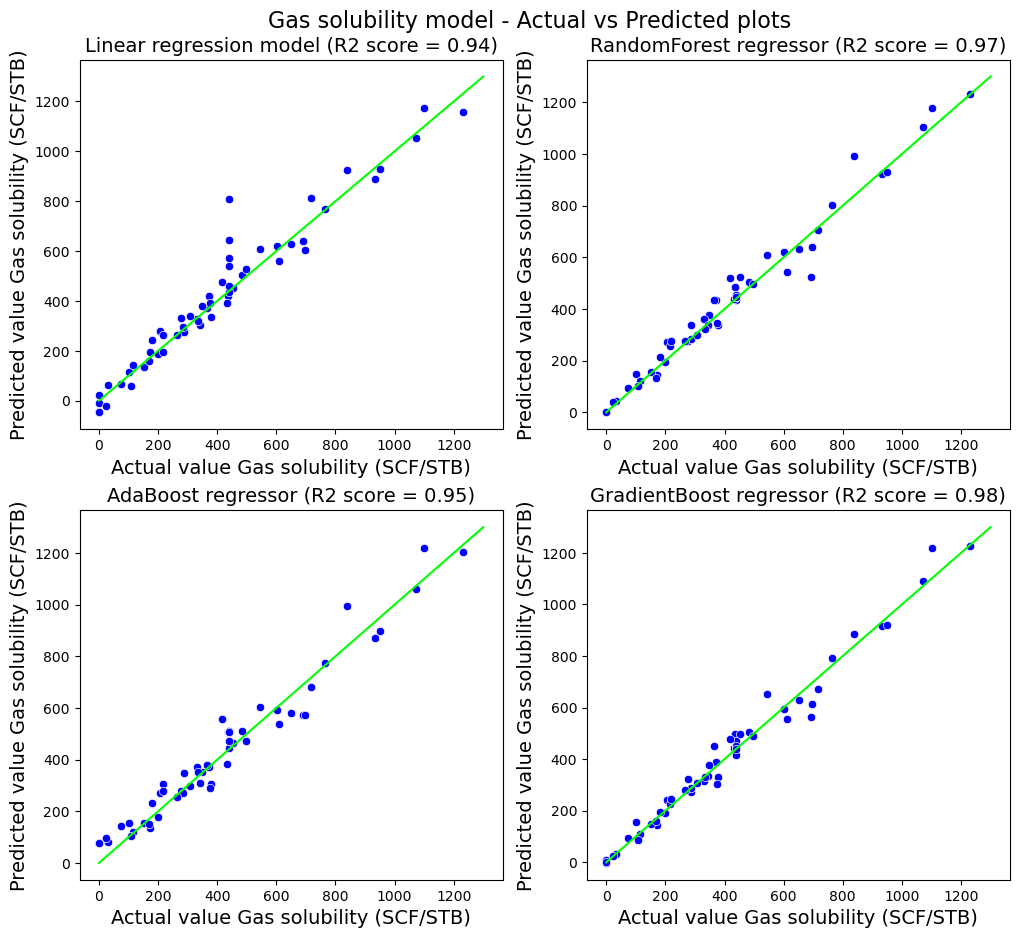

In [163]:
fig = plt.figure(figsize = (12,10))

fig.add_subplot(2,2,1)
#plt.figure(figsize=(5,5))
sns.scatterplot(x =y_val,y = y_pred1, color ="blue")
plt.plot((0,1300),(0,1300), c= 'lime')
#plt.figsize(10,10)
plt.title(f'Linear regression model (R2 score = {round(r2_lin1,2)})',fontsize = 14)
plt.xlabel('Actual value Gas solubility (SCF/STB)',fontsize = 14)
plt.ylabel('Predicted value Gas solubility (SCF/STB)',fontsize = 14)
# plt.xlim(1,1.8)
# plt.ylim(1,1.8)


########################################################
fig.add_subplot(2,2,2)
#plt.figure(figsize=(5,5))
sns.scatterplot(x= y_val,y =y_pred2, color ="blue")
plt.plot((0,1300),(0,1300), c= 'lime')
#plt.figsize(10,10)
plt.title(f'RandomForest regressor (R2 score = {round(r2_rf1,2)})',fontsize = 14)
plt.xlabel('Actual value Gas solubility (SCF/STB)',fontsize = 14)
plt.ylabel('Predicted value Gas solubility (SCF/STB)',fontsize = 14)
# plt.xlim(1,1.8)
# plt.ylim(1,1.8)

########################################################
fig.add_subplot(2,2,3)
#plt.figure(figsize=(5,5))
sns.scatterplot(x = y_val,y = y_pred3, color ="blue")
plt.plot((0,1300),(0,1300), c= 'lime')
#plt.figsize(10,10)
plt.title(f'AdaBoost regressor (R2 score = {round(r2_ada1,2)})',fontsize = 14)
plt.xlabel('Actual value Gas solubility (SCF/STB)',fontsize = 14)
plt.ylabel('Predicted value Gas solubility (SCF/STB)',fontsize = 14)
# plt.xlim(1,1.8)
# plt.ylim(1,1.8)

########################################################
fig.add_subplot(2,2,4)
#plt.figure(figsize=(5,5))
sns.scatterplot(x = y_val,y = y_pred4, color ="blue")
plt.plot((0,1300),(0,1300), c= 'lime')
#plt.figsize(10,10)
plt.title(f'GradientBoost regressor (R2 score = {round(r2_gb1,2)})',fontsize = 14)
plt.xlabel('Actual value Gas solubility (SCF/STB)',fontsize = 14)
plt.ylabel('Predicted value Gas solubility (SCF/STB)',fontsize = 14)
# plt.xlim(1,1.8)
# plt.ylim(1,1.8)

#################
fig.suptitle('Gas solubility model - Actual vs Predicted plots', fontsize  = 16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.22)
fig.subplots_adjust(top=0.93)
plt.savefig('Actual vs Predicted scatter plots gas solubility model.png', dpi = 1200,  bbox_inches='tight')
plt.show()

# Residual plots

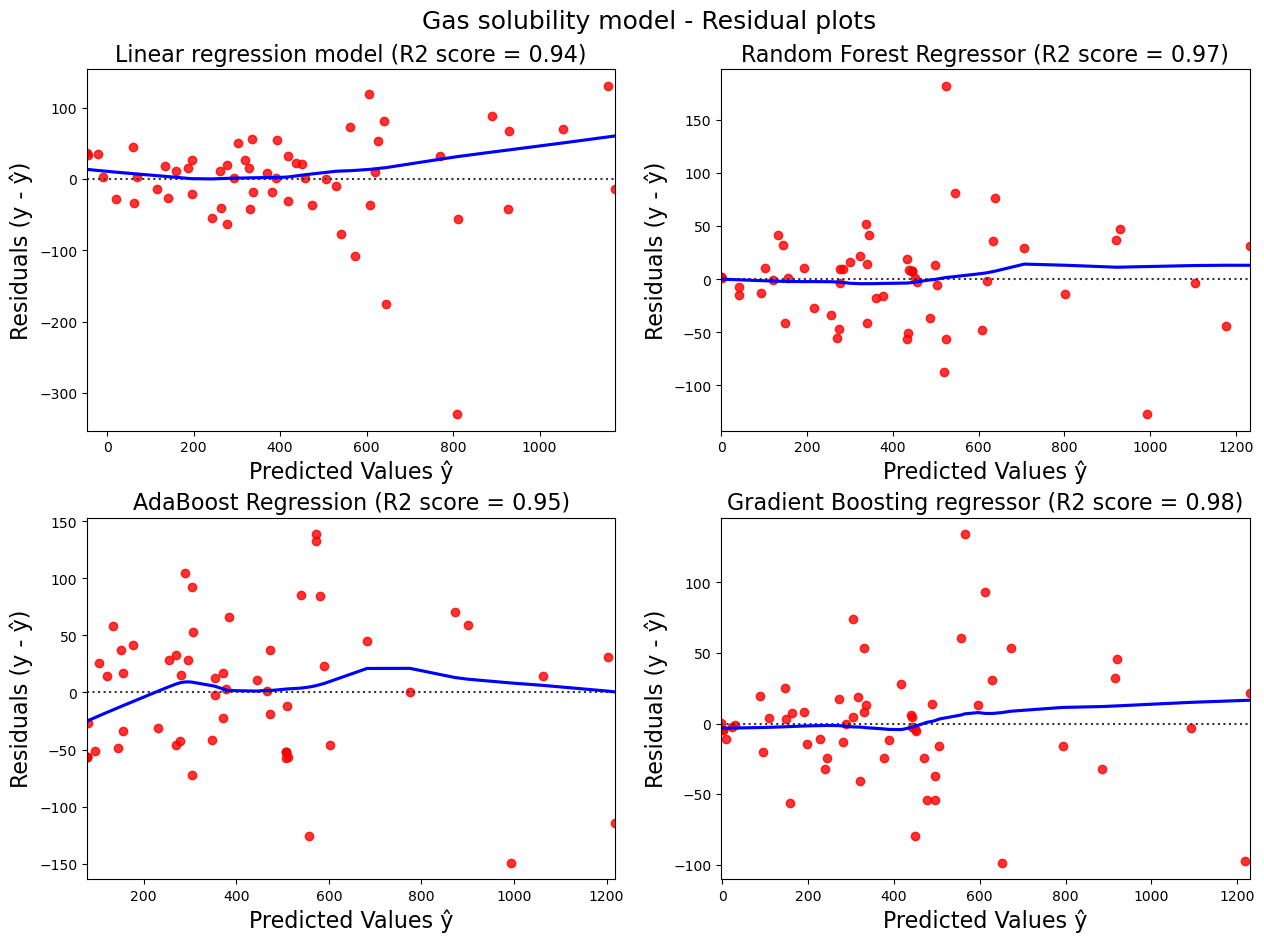

In [166]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(2,2,1)
# Calculate residuals
predicted = y_pred1
residuals = y_val - y_pred1

# residual plots for linear regression
sns.residplot(x = predicted, y = residuals, lowess=True,color='red', line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ',fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'Linear regression model (R2 score = {round(r2_lin1,2)})',fontsize = 16)
#plt.show()

########################################################
fig.add_subplot(2,2,2)
# Calculate residuals
predicted = y_pred2
residuals2 = y_val - y_pred2

# residual plots for Random Forest Regressor
sns.residplot(x = predicted, y = residuals2, lowess=True,color='red', line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ',fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'Random Forest Regressor (R2 score = {round(r2_rf1,2)})',fontsize = 16)
#plt.show()

########################################################
fig.add_subplot(2,2,3)
# Calculate residuals
predicted = y_pred3
residuals3 = y_val - y_pred3

# residual plots for XGBoost regressor

sns.residplot(x = predicted, y = residuals3, lowess=True, color='red', line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ',fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'AdaBoost Regression (R2 score = {round(r2_ada1,2)})',fontsize = 16)
#plt.show()

########################################################
fig.add_subplot(2,2,4)
# Calculate residuals
predicted = y_pred4
residuals4 = y_val - y_pred4

# residual plots for XGBoost regressor
sns.residplot(x = predicted, y = residuals4, lowess=True, color = "red", line_kws=dict(color="blue"))
plt.xlabel('Predicted Values ŷ',fontsize = 16)
plt.ylabel('Residuals (y - ŷ)',fontsize = 16)
plt.title(f'Gradient Boosting regressor (R2 score = {round(r2_gb1,2)})',fontsize = 16)

#################
fig.suptitle('Gas solubility model - Residual plots', fontsize  = 18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.20, hspace=0.24)
fig.subplots_adjust(top=0.92)
plt.savefig('Residual scatter plot gas solubility model.png', dpi = 1200,  bbox_inches='tight')
plt.show()

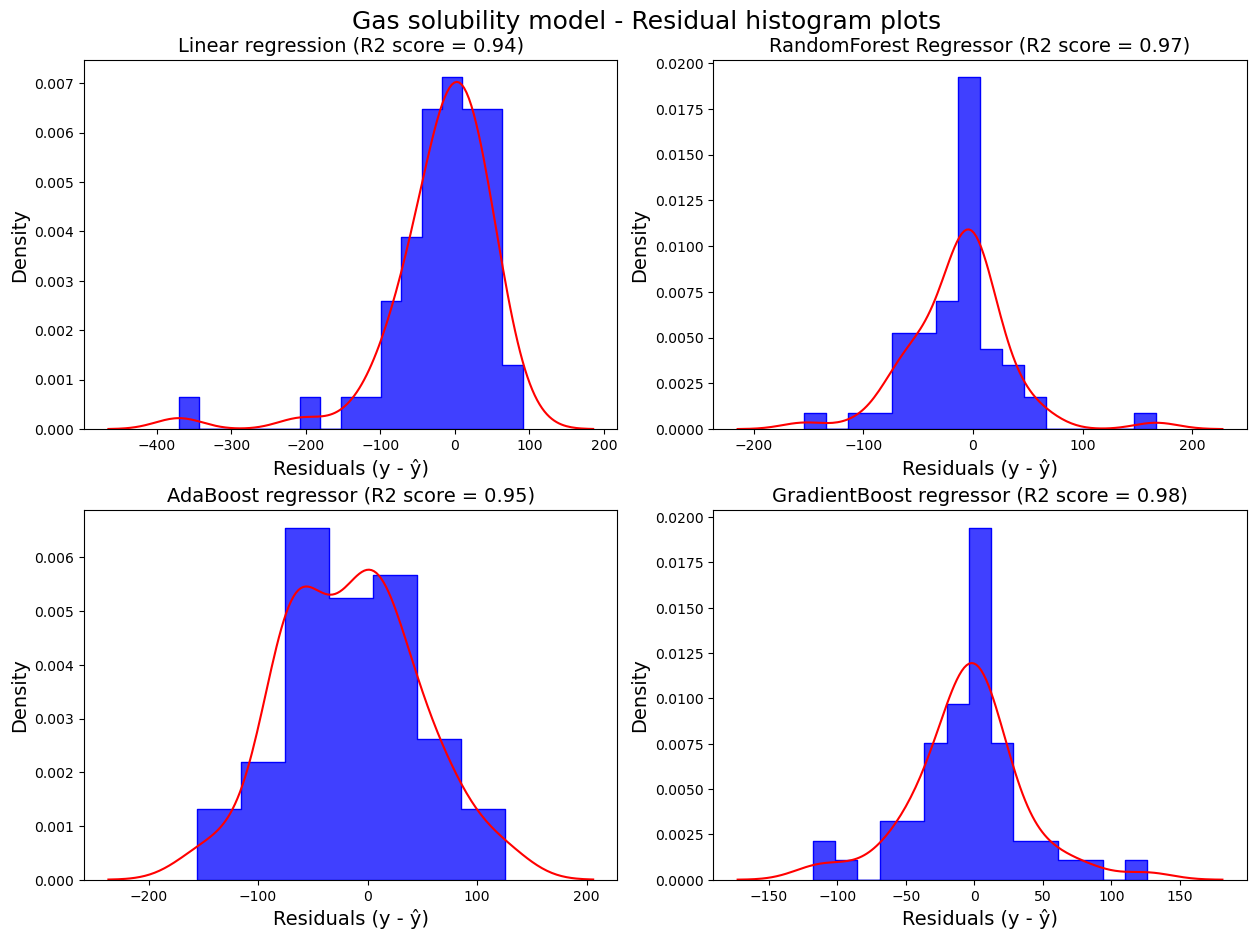

In [167]:
fig = plt.figure(figsize = (15,10))
palette = ['springgreen']
color_name = 'blue'

fig.add_subplot(2,2,1)
# Calculate residuals
predicted = y_pred1
residuals = y_val - y_pred1

# residual plots for linear regression
sns.histplot(x=residuals, stat = 'density',kde=False,element = "step" ,color = color_name)
sns.kdeplot(x = residuals, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'Linear regression (R2 score = {round(r2_lin1,2)})',fontsize = 14)
#plt.show()

########################################################
fig.add_subplot(2,2,2)
# Calculate residuals
predicted = y_pred2
residuals2 = y_val - y_pred2

# residual plots for Random Forest Regressor
sns.histplot(x=residuals2, stat = 'density',kde=False,element = "step",color = color_name)
sns.kdeplot(x = residuals2, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'RandomForest Regressor (R2 score = {round(r2_rf1,2)})',fontsize = 14)
#plt.show()

########################################################
fig.add_subplot(2,2,3)
# Calculate residuals
predicted = y_pred3
residuals3 = y_val - y_pred3

# residual plots for AdaBoost regressor

sns.histplot(x=residuals3, stat = 'density',kde=False,element = "step",color = color_name)
sns.kdeplot(x = residuals3, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'AdaBoost regressor (R2 score = {round(r2_ada1,2)})',fontsize = 14)
#plt.show()

########################################################
fig.add_subplot(2,2,4)
# Calculate residuals
predicted = y_pred4
residuals4 = y_val - y_pred4

# residual plots for GradientBoost regressor
sns.histplot(x=residuals4, stat = 'density',kde=False,element = "step",color = color_name)
sns.kdeplot(x = residuals4, color='red')
plt.ylabel('Density',fontsize = 14)
plt.xlabel('Residuals (y - ŷ)',fontsize = 14)
plt.title(f'GradientBoost regressor (R2 score = {round(r2_gb1,2)})',fontsize = 14)

#################
fig.suptitle('Gas solubility model - Residual histogram plots', fontsize  = 18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.18, hspace=0.22)
fig.subplots_adjust(top=0.93)
plt.savefig('Residual Hist plots Sol GOR model.png', dpi = 1200,  bbox_inches='tight')
plt.show()

# Testing on unseen data

In [28]:
df_test_data = pd.read_excel(############\ML_model_pvt_training_data\cmg model test\test data GOR new Goldie 1 BHS\test_data_Rs_model_cmg.xlsx")
# this is unseen data for model (Goldie-1BHS)

In [37]:
df_test_corr = pd.read_excel(############\ML_model_pvt_training_data\cmg model test\test data GOR new Goldie 1 BHS\Test_data_Rs_for_corr.xlsx")

In [29]:
df_test_data

,p,Rs,Bo,Oil_dens,Deviation factor Z,Temp_F,Gas_spgr
0,5000,346,1.1521,0.7907,0.000,143,0.000
1,4000,346,1.1593,0.7858,0.000,143,0.000
2,3000,346,1.1673,0.7804,0.000,143,0.000
3,2500,346,1.1719,0.7773,0.000,143,0.000
4,2000,346,1.1770,0.7739,0.000,143,0.000
5,1775,346,1.1795,0.7723,0.000,143,0.000
6,1600,316,1.1691,0.7757,0.876,143,0.612
7,1400,279,1.1547,0.7812,0.886,143,0.610
8,1200,242,1.1403,0.7867,0.897,143,0.612
9,1000,204,1.1242,0.7926,0.908,143,0.615


# Predictions on Unseen data (Goldie-1 BHS)

In [176]:
y_pred1_unseen = regl.predict(df_test_data[['p', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr']])  # linear regression

y_pred2_unseen = regr.predict(df_test_data[['p', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr']])  # linear regression

y_pred3_unseen = reg_ada.predict(df_test_data[['p', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr']])  # linear regression

y_pred4_unseen = reg_gb.predict(df_test_data[['p', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr']])  # Gradient Boost regression

y_pred4_unseen = reg_gb.predict(df_test_data[['p', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr']])  # Gradient Boost regression

y_predNN_unseen = reg_MLP.predict(df_test_data[['p', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr']])  # MLP regression


In [66]:
df_test_data.columns

Index(['p', 'Rs', 'Bo', 'Oil_dens', 'Deviation factor Z', 'Temp_F',
       'Gas_spgr'],
      dtype='object')

# Model evaluation metrics for unseen dataset of Goldie-1 BHS

In [81]:
#####################################################
# Mean Absolute Error (MAE)
mae_lin = metrics.mean_absolute_error(df_test_data['Rs'], y_pred1_unseen)  # linnear regression
print("MAE_lin: ", round(mae_lin,2))
mae_rf = metrics.mean_absolute_error(df_test_data['Rs'], y_pred2_unseen)  # random forest regressor
print("MAE_rf: ", round(mae_rf,3))
mae_ada = metrics.mean_absolute_error(df_test_data['Rs'], y_pred3_unseen)  # Ada Boost regression
print("MAE_ada: ", round(mae_ada,2))
mae_gb = metrics.mean_absolute_error(df_test_data['Rs'], y_pred4_unseen)  # Gradient boost
print("MAE_gb: ", round(mae_gb,2))
######################################################
# Mean Squared Error (MSE)
mse_lin = metrics.mean_squared_error(df_test_data['Rs'], y_pred1_unseen)  # linnear regression
print("MSE_lin: ", round(mse_lin,2))
mse_rf = metrics.mean_squared_error(df_test_data['Rs'], y_pred2_unseen)  # random forest regressor
print("MSE_rf: ", round(mse_rf,2))
mse_ada = metrics.mean_squared_error(df_test_data['Rs'], y_pred3_unseen)  # Ada Boost regression
print("MSE_ada: ", round(mse_ada,2))
mse_gb = metrics.mean_squared_error(df_test_data['Rs'], y_pred4_unseen)  # Gradient boost
print("MSE_gb: ", round(mse_gb,2))
########################################################
# Root Mean Squared Error (RMSE)
rmse_lin = mse_lin**(1/2)
print("RMSE_lin: ", round(rmse_lin,2))
rmse_rf = mse_rf**(1/2)
print("RMSE_rf: ", round(rmse_rf,2))
rmse_ada = mse_ada**(1/2)
print("RMSE_ada: ", round(rmse_ada,2))
rmse_gb = mse_gb**(1/2)
print("RMSE_gb: ", round(rmse_gb,2))
########################################################
# Mean Absolute Percentage Error (MAPE)
mape_lin = metrics.mean_absolute_percentage_error(df_test_data['Rs'], y_pred1_unseen) # linear regression
print("MAPE Linear Regression: ",round(mape_lin,2))
mape_rf = metrics.mean_absolute_percentage_error(df_test_data['Rs'], y_pred2_unseen) # random forest regressor
print("MAPE Random forest regressor: ",round(mape_rf,2))
mape_ada = metrics.mean_absolute_percentage_error(df_test_data['Rs'], y_pred3_unseen) # ada boost regressor
print("MAPE Ada Boost Regressor: ",round(mape_ada,2))
mape_gb = metrics.mean_absolute_percentage_error(df_test_data['Rs'], y_pred4_unseen) # Gradient boost regressor
print("MAPE Gradient Boost Regressor: ",round(mape_gb,2))
########################################################
# R2 Score
r2_lin = metrics.r2_score(df_test_data['Rs'],y_pred1_unseen)  # Linear regression
print("R2-Score Linear Regression: ",round(r2_lin,2))
r2_rf = metrics.r2_score(df_test_data['Rs'],y_pred2_unseen)  # Random forest regressor
print("R2-Score Random Forest Regressor: ",round(r2_rf,2))
r2_ada = metrics.r2_score(df_test_data['Rs'],y_pred3_unseen)  # AdaBoost regressor
print("R2-Score Ada Boost Regressor: ",round(r2_ada,2))
r2_gb = metrics.r2_score(df_test_data['Rs'],y_pred4_unseen)  # GradientBoost regression
print("R2-Score Gradient Boost Regressor: ",round(r2_gb,2))

MAE_lin:  37.06
MAE_rf:  16.571
MAE_ada:  38.73
MAE_gb:  17.51
MSE_lin:  1544.78
MSE_rf:  476.7
MSE_ada:  2204.77
MSE_gb:  483.99
RMSE_lin:  39.3
RMSE_rf:  21.83
RMSE_ada:  46.95
RMSE_gb:  22.0
MAPE Linear Regression:  1.0554974472903884e+16
MAPE Random forest regressor:  78062393541088.67
MAPE Ada Boost Regressor:  2.338380920807209e+16
MAPE Gradient Boost Regressor:  1823485510947132.2
R2-Score Linear Regression:  0.89
R2-Score Random Forest Regressor:  0.97
R2-Score Ada Boost Regressor:  0.84
R2-Score Gradient Boost Regressor:  0.97


# solution to the problem MAPE is exceptionally too high
https://stats.stackexchange.com/questions/415047/why-is-the-mape-exceptionally-high


In [92]:
# Test to correct MAPE and other eevaluation parameters
print(list(df_test_data['Rs']))
print(y_pred1_unseen)
# the data has 1 zero point that causes MAPE to be high.

mape_lin_test1 = metrics.mean_absolute_percentage_error(list(df_test_data['Rs']), y_pred1_unseen) # linear regression

# after removing the zero point
mape_lin_test2 = metrics.mean_absolute_percentage_error(list(df_test_data['Rs'][0:len(df_test_data)-1]), y_pred1_unseen[0:len(y_pred1_unseen)-1]) # linear regression
print("MAPE Linear Regression : ",round(mape_lin_test1,2))
print("MAPE Linear Regression corrected: ",round(mape_lin_test2,2))


[346, 346, 346, 346, 346, 346, 316, 279, 242, 204, 167, 130, 90, 49, 0]
[417.14898562 375.43012967 335.19243654 316.19027369 298.1109318
 290.34126394 279.63699665 242.53102111 205.60288175 165.729102
 131.12707201  95.49966694  59.14662286  21.79627979 -35.15512705]
MAPE Linear Regression :  1.0554974472903884e+16
MAPE Linear Regression corrected:  0.19


In [107]:
me_lin = metrics.max_error(df_test_data['Rs'], y_pred1_unseen)  # linnear regression
print("MaxEr_lin: ", round(me_lin,2))
me_rf = metrics.max_error(df_test_data['Rs'], y_pred2_unseen)  # random forest regressor
print("MaxEr_rf: ", round(me_rf,2))
me_ada = metrics.max_error(df_test_data['Rs'], y_pred3_unseen)  # Ada Boost regression
print("MaxEr_ada: ", round(me_ada,2))
me_gb = metrics.max_error(df_test_data['Rs'], y_pred4_unseen)  # Gradient boost
print("MaxEr_gb: ", round(me_gb,2))
#####################################################
# Mean Absolute Error (MAE)
mae_lin = metrics.mean_absolute_error(df_test_data['Rs'], y_pred1_unseen)  # linnear regression
print("MAE_lin: ", round(mae_lin,2))
mae_rf = metrics.mean_absolute_error(df_test_data['Rs'], y_pred2_unseen)  # random forest regressor
print("MAE_rf: ", round(mae_rf,3))
mae_ada = metrics.mean_absolute_error(df_test_data['Rs'], y_pred3_unseen)  # Ada Boost regression
print("MAE_ada: ", round(mae_ada,2))
mae_gb = metrics.mean_absolute_error(df_test_data['Rs'], y_pred4_unseen)  # Gradient boost
print("MAE_gb: ", round(mae_gb,2))
######################################################
# Mean Squared Error (MSE)
mse_lin = metrics.mean_squared_error(df_test_data['Rs'], y_pred1_unseen)  # linnear regression
print("MSE_lin: ", round(mse_lin,2))
mse_rf = metrics.mean_squared_error(df_test_data['Rs'], y_pred2_unseen)  # random forest regressor
print("MSE_rf: ", round(mse_rf,2))
mse_ada = metrics.mean_squared_error(df_test_data['Rs'], y_pred3_unseen)  # Ada Boost regression
print("MSE_ada: ", round(mse_ada,2))
mse_gb = metrics.mean_squared_error(df_test_data['Rs'], y_pred4_unseen)  # Gradient boost
print("MSE_gb: ", round(mse_gb,2))
########################################################
# Root Mean Squared Error (RMSE)
rmse_lin = mse_lin**(1/2)
print("RMSE_lin: ", round(rmse_lin,2))
rmse_rf = mse_rf**(1/2)
print("RMSE_rf: ", round(rmse_rf,2))
rmse_ada = mse_ada**(1/2)
print("RMSE_ada: ", round(rmse_ada,2))
rmse_gb = mse_gb**(1/2)
print("RMSE_gb: ", round(rmse_gb,2))
########################################################
# Mean Absolute Percentage Error (MAPE) - corrected (0 point sof true and dpred values are removed)
mape_lin = metrics.mean_absolute_percentage_error(list(df_test_data['Rs'][0:len(df_test_data)-1]), y_pred1_unseen[0:len(y_pred1_unseen)-1]) # linear regression
print("MAPE Linear Regression: ",round(mape_lin,2))
mape_rf = metrics.mean_absolute_percentage_error(list(df_test_data['Rs'][0:len(df_test_data)-1]), y_pred2_unseen[0:len(y_pred2_unseen)-1]) # random forest regressor
print("MAPE Random forest regressor: ",round(mape_rf,2))
mape_ada = metrics.mean_absolute_percentage_error(list(df_test_data['Rs'][0:len(df_test_data)-1]), y_pred3_unseen[0:len(y_pred3_unseen)-1]) # ada boost regressor
print("MAPE Ada Boost Regressor: ",round(mape_ada,2))
mape_gb = metrics.mean_absolute_percentage_error(list(df_test_data['Rs'][0:len(df_test_data)-1]), y_pred4_unseen[0:len(y_pred4_unseen)-1]) # Gradient boost regressor
print("MAPE Gradient Boost Regressor: ",round(mape_gb,2))
########################################################
# R2 Score
r2_lin = metrics.r2_score(df_test_data['Rs'],y_pred1_unseen)  # Linear regression
print("R2-Score Linear Regression: ",round(r2_lin,2))
r2_rf = metrics.r2_score(df_test_data['Rs'],y_pred2_unseen)  # Random forest regressor
print("R2-Score Random Forest Regressor: ",round(r2_rf,2))
r2_ada = metrics.r2_score(df_test_data['Rs'],y_pred3_unseen)  # AdaBoost regressor
print("R2-Score Ada Boost Regressor: ",round(r2_ada,2))
r2_gb = metrics.r2_score(df_test_data['Rs'],y_pred4_unseen)  # GradientBoost regression
print("R2-Score Gradient Boost Regressor: ",round(r2_gb,2))

# Note: the correction is only required in MAPE, if the zero points of the true label is removed for 
#       other variables then it does not have any effect and reduces the accuracy of results

MaxEr_lin:  71.15
MaxEr_rf:  45.62
MaxEr_ada:  77.88
MaxEr_gb:  41.11
MAE_lin:  37.06
MAE_rf:  16.571
MAE_ada:  38.73
MAE_gb:  17.51
MSE_lin:  1544.78
MSE_rf:  476.7
MSE_ada:  2204.77
MSE_gb:  483.99
RMSE_lin:  39.3
RMSE_rf:  21.83
RMSE_ada:  46.95
RMSE_gb:  22.0
MAPE Linear Regression:  0.19
MAPE Random forest regressor:  0.07
MAPE Ada Boost Regressor:  0.18
MAPE Gradient Boost Regressor:  0.09
R2-Score Linear Regression:  0.89
R2-Score Random Forest Regressor:  0.97
R2-Score Ada Boost Regressor:  0.84
R2-Score Gradient Boost Regressor:  0.97


In [121]:
models = ['Linear regression','RandomForest regressor','AdaBoost regressor','GradientBoost regressor']
me2 = [me_lin,me_rf,me_ada,me_gb]
mae2 = [mae_lin,mae_rf,mae_ada, mae_gb]
mse2 = [mse_lin,mse_rf,mse_ada,mse_gb]
rmse2 = [rmse_lin,rmse_rf,rmse_ada,rmse_gb]
mape2 = [mape_lin,mape_rf,mape_ada,mape_gb]
r2score2 = [r2_lin,r2_rf,r2_ada,r2_gb]

me2 = [round(i,2) for i in me2]
mae2 = [round(i,2) for i in mae2]
mse2 = [round(i,2) for i in mse2]
rmse2 = [round(i,2) for i in rmse2]
mape2 = [round(i,2) for i in mape2]
r2score2 = [round(i,2) for i in r2score2]

model_eval2 = pd.DataFrame(data={"Model":models,"MAE": mae2,"MSE":mse2,"RMSE":rmse2,"MAPE":mape2, "Max Error": me2,"R2 Score":r2score2})
model_eval2.to_csv(r"C:\Users\sarth\OneDrive\Documents\My Projects\Project2_sem7\cmg trial\ML models with cmg\model eval results\Rs model result\Rs model results unseen data.csv", index =False)
model_eval2

,Model,MAE,MSE,RMSE,MAPE,Max Error,R2 Score
0,Linear regression,37.06,1544.78,39.30,0.19,71.15,0.89
1,RandomForest regressor,16.57,476.70,21.83,0.07,45.62,0.97
2,AdaBoost regressor,38.73,2204.77,46.95,0.18,77.88,0.84
3,GradientBoost regressor,17.51,483.99,22.00,0.09,41.11,0.97


0.9601826284036624

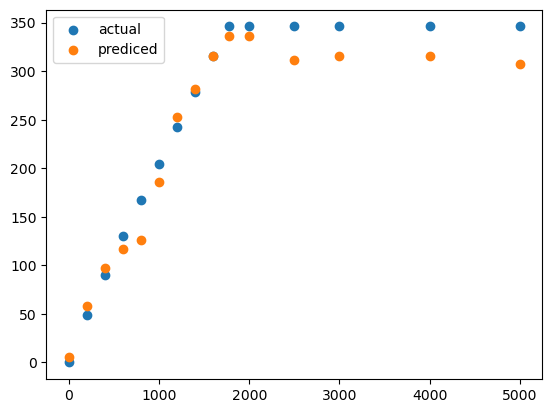

In [120]:
plt.scatter(df_test_data['p'],df_test_data['Rs'], label = "actual")
plt.scatter(df_test_data['p'],y_pred4_unseen,label = "prediced")
plt.legend()
metrics.r2_score(y_pred4_unseen,df_test_data['Rs'])

In [33]:
df_cmg = pd.read_excel(###############\ML_model_pvt_training_data\cmg model test\cmg output Goldie 1\cmg output goldie 1.xlsx")

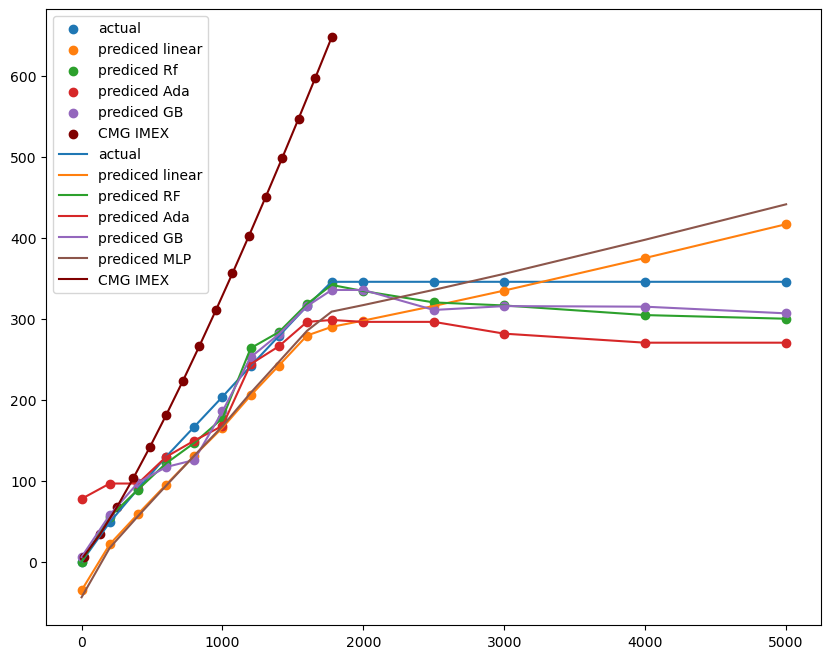

In [178]:
plt.figure(figsize = (10,8))
plt.scatter(df_test_data['p'],df_test_data['Rs'], label = "actual")
plt.scatter(df_test_data['p'],y_pred1_unseen,label = "prediced linear")
plt.scatter(df_test_data['p'],y_pred2_unseen,label = "prediced Rf")
plt.scatter(df_test_data['p'],y_pred3_unseen,label = "prediced Ada")
plt.scatter(df_test_data['p'],y_pred4_unseen,label = "prediced GB")
plt.scatter(df_cmg['P_psi'],df_cmg['Rs_ft3/bbl'], color = "maroon", label = "CMG IMEX")

plt.plot(df_test_data['p'],df_test_data['Rs'], label = "actual")
plt.plot(df_test_data['p'],y_pred1_unseen,label = "prediced linear", linestyle = None)
plt.plot(df_test_data['p'],y_pred2_unseen,label = "prediced RF", linestyle = None)
plt.plot(df_test_data['p'],y_pred3_unseen,label = "prediced Ada", linestyle = None)
plt.plot(df_test_data['p'],y_pred4_unseen,label = "prediced GB", linestyle = None)
plt.plot(df_test_data['p'],y_predNN_unseen,label = "prediced MLP", linestyle = None)

plt.plot(df_cmg['P_psi'],df_cmg['Rs_ft3/bbl'], color = "maroon", label = "CMG IMEX")
plt.legend()
#metrics.r2_score(y_pred4_unseen,df_test_data['Rs'])
plt.show()

In [36]:
df_test_data.head()

,p,Rs,Bo,Oil_dens,Deviation factor Z,Temp_F,Gas_spgr
0,5000,346,1.1521,0.7907,0.0,143,0.0
1,4000,346,1.1593,0.7858,0.0,143,0.0
2,3000,346,1.1673,0.7804,0.0,143,0.0
3,2500,346,1.1719,0.7773,0.0,143,0.0
4,2000,346,1.1770,0.7739,0.0,143,0.0


In [38]:
# scatter plot marker parameter
# marker value	        Description
#     "."	            point
#     ","	            pixel
#     "o"	            circle
#     "v"	            triangle_down
#     "^"	            triangle_up
#     "<"	            triangle_left
#     ">"	            triangle_right
#     "1"	            tri_down
#     "2"	            tri_up
#     "3"	            tri_left
#     "4"	            tri_right
#     "8"	            octagon
#     "s"	            square
#     "p"	            pentagon

# Rs correlations

In [39]:
Pb = 1775
df_corr = df_test_corr

# 01 Al-Marhoun (1988)

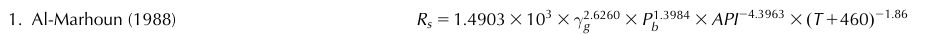

In [40]:
# Note: use "gas_spgr" not "Gas_spgr"

marhoun = []
for i in range(len(df_test_corr)):
    a = 185.843208
    b = 1.877840
    c = -3.1437
    d = -1.32657
    e = 1.398441
    marh = (a*((df_test_corr['gas_spgr'][i])**b)*((df_test_corr['spgr_oil_60'][i])**c)*(((df_test_corr['Temp_F'][i])+459.67)**d)*(df_test_corr['p'][i]))**e
    marhoun.append(marh)
print(marhoun)

[197.20636067085817, 157.41470248519212, 124.2229030876942, 94.45989811969427, 68.75857439928423, 46.98712794804057, 27.980155940567546, 12.249302706993713, 0.0]


# 02 Dindoruk and Christman (2001)

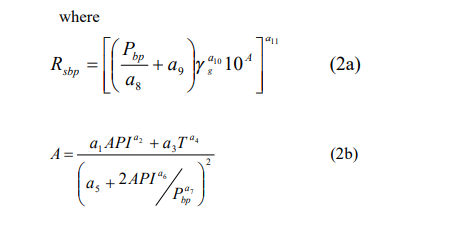

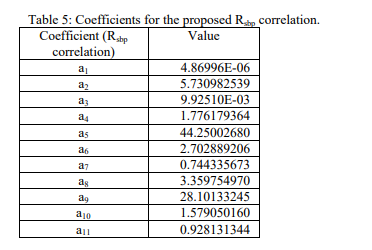

In [42]:
dindoruk_2001 = []
a1 = 4.86996 * 10**(-6)
a2 = 5.730982539
a3 = 9.92510 * 10**(-3)
a4 = 1.776179364
a5 = 44.2500268
a6 = 2.702889206
a7 = 0.744335673
a8 = 3.359754970
a9 = 28.10133245
a10 = 1.579050160
a11 = 0.928131344

for i in range(len(df_corr)):
    A = (a1*(df_corr['API_60'][i])**a2 + a3 * (df_corr["Temp_F"][i])**a4)/(a5 + ((2*(df_corr['API_60'][i])**a6)/Pb**a7))**2
    Rs_dind = ((Pb/a8 + a9)* ((df_corr['gas_spgr'][i])**a10)*10**A)**a11
    dindoruk_2001.append(Rs_dind)
print(dindoruk_2001)    

[246.53445441707987, 241.4779051711671, 238.74965169930434, 236.284137993798, 235.5348454172051, 238.32297817548672, 244.78450362886431, 265.0384270318923, 401.49297970841116]


# 03 Elsharkawy and Alikhan (1997)

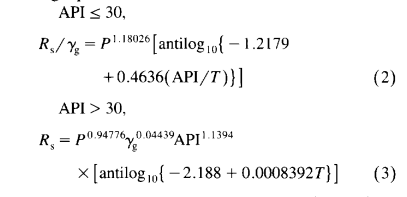

In [43]:
elsharkawy_1997 = []
for i in range(len(df_corr)):
    if df_corr["API_60"][i] <= 30:
        Rs_elsha = (df_corr['gas_spgr'][i])*((df_corr['p'][i])**1.18026)*(10**(-1.2179+0.4636*(df_corr['API_60'][i])/(df_corr['Temp_F'][i])))
    if df_corr["API_60"][i] > 30:
        Rs_elsha = ((df_corr['p'][i])**0.94776)*((df_corr['gas_spgr'][i])**0.04439)*((df_corr['API_60'][i])**1.1394)*(10**(-2.188 + 0.0008392*df_corr["Temp_F"][i]))
    elsharkawy_1997.append(Rs_elsha)        
print(elsharkawy_1997)    

[595.3504543818436, 506.8230337866109, 422.98794204582043, 342.6410457224616, 267.05866135781406, 196.26246580586044, 128.88012365116037, 64.2196313930596, 0.0]


# 04 Øistein GlasØ (1980)

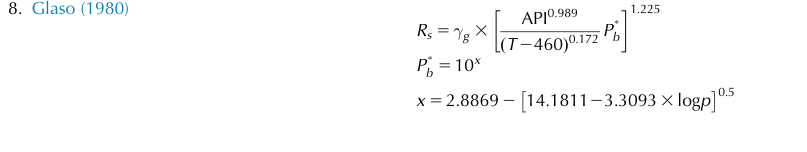

In [44]:
df_corr

,p,Rs,Bo,Oil_dens,Deviation factor Z,Temp_F,gas_spgr,API,Standing,spgr_water_187,spgr_oil_187,spgr_stock,spgr_oil_60,API_60,Gas_spgr
0,1600,316,1.1691,0.7757,0.876,143,0.612,50.915882,3.877132,0.9679,0.801426,0.7981,0.828899,39.208421,0.639473
1,1400,279,1.1547,0.7812,0.886,143,0.610,49.631592,3.697066,0.9679,0.807108,0.7981,0.834581,38.046120,0.637473
2,1200,242,1.1403,0.7867,0.897,143,0.612,48.365260,3.550728,0.9679,0.812791,0.7981,0.840264,36.899540,0.639473
3,1000,204,1.1242,0.7926,0.908,143,0.615,47.026369,3.407178,0.9679,0.818886,0.7981,0.846359,35.686688,0.642473
4,800,167,1.1111,0.7984,0.920,143,0.621,45.729459,3.289996,0.9679,0.824879,0.7981,0.852352,34.511303,0.648473
5,600,130,1.0972,0.8038,0.935,143,0.633,44.538816,3.218725,0.9679,0.830458,0.7981,0.857931,33.431738,0.660473
6,400,90,1.0827,0.8093,0.951,143,0.652,43.342456,3.181414,0.9679,0.836140,0.7981,0.863613,32.346519,0.679473
7,200,49,1.0670,0.8154,0.971,143,0.697,42.034462,3.251085,0.9679,0.842442,0.7981,0.869915,31.159495,0.724473
8,0,0,1.0351,0.8296,1.000,143,0.952,39.064127,4.008498,0.9679,0.857113,0.7981,0.884586,28.461774,0.979473


In [45]:
glaso_1980 = []

for i in range(len(df_corr)):
    if df_corr["p"][i] == 0:
        x = 2.8869 - (14.1811-3.3093*(np.log10(1.1)))**0.5
        pb_star = 10**x
        Rs_gls = (df_corr['gas_spgr'][i])*(pb_star * ((((df_corr['API_60'][i]))**0.989)/((df_corr['Temp_F'][i]))**0.172))**1.225
    elif df_corr['p'][i] !=0:    
        x = 2.8869 - (14.1811-3.3093*(np.log10(df_corr["p"][i])))**0.5
        pb_star = 10**x
        Rs_gls = (df_corr['gas_spgr'][i])*(pb_star * ((((df_corr['API_60'][i]))**0.989)/((df_corr['Temp_F'][i])**0.172)))**1.225
    glaso_1980.append(Rs_gls)
print(glaso_1980)    

[303.6879646640576, 253.41898942077827, 209.05797511685014, 168.16890250115003, 131.46923177127306, 98.75605055227814, 68.33357022581141, 39.44942283846486, 1.706428345213183]


# 05 Hassan (2011)

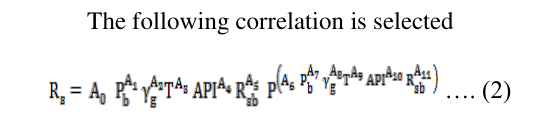

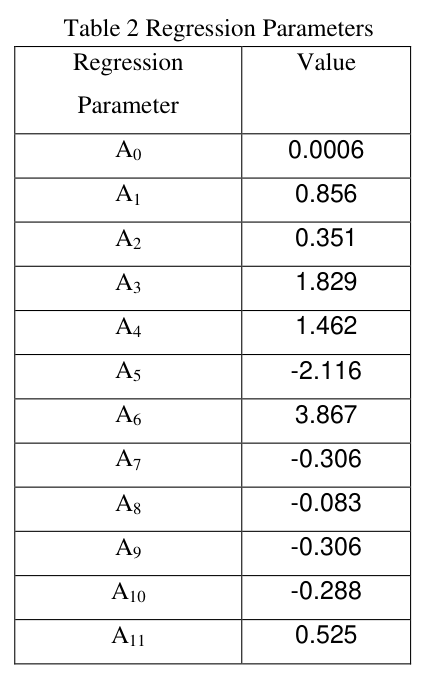

In [46]:
hassan_2011 = []
Rsb = 346
a0 = 0.0006
a1 = 0.856
a2 = 0.351
a3 = 1.829
a4 = 1.462
a5 = -2.116
a6 = 3.867
a7 = -0.306
a8 = -0.083
a9 = -0.306
a10 = -0.288
a11 = 0.525
for i in range(len(df_corr)):
    x = a6 * (Pb**a7)*((df_corr['gas_spgr'][i])**a8) * ((df_corr['Temp_F'][i])**a9)*((df_corr['API_60'][i])**a10)*((Rsb)**a11)
    Rs_hssn = a0 * (Pb**a1) * ((df_corr['gas_spgr'][i])**a2) *  ((df_corr['Temp_F'][i])**a3) * ((df_corr['API_60'][i])**a4) * ((Rsb)**a5) * ((df_corr['p'][i])**x)
    hassan_2011.append(Rs_hssn)
print(hassan_2011)

[336.5322814519475, 307.2716146973534, 276.20553586784223, 243.09122044078137, 207.54398013569278, 168.9922082204803, 126.26700830755641, 76.64272162680335, 0.0]


# 06 Hemmati and Kharrat (2007)

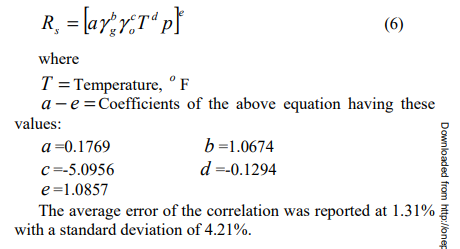

In [47]:
hemma_2007 = []
a = 0.1769
b = 1.0674
c = -5.0956
d = -0.1294
e = 1.0857
for i in range(len(df_corr)):
    Rs_hemma = (a*((df_corr['gas_spgr'][i])**b)*((df_corr['spgr_oil_60'][i])**c) * ((df_corr['Temp_F'][i])**d) * (df_corr['p'][i]))**e
    hemma_2007.append(Rs_hemma)
print(hemma_2007)

[365.52226052685137, 303.31209102188404, 248.05593047431898, 196.6421569538072, 150.1055173396435, 108.31985074435646, 69.59035913326588, 34.02837231616064, 0.0]


# 07 Khamehchi and Ebrahimian (2009)

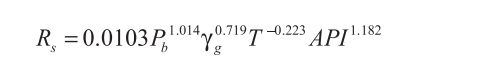

In [48]:
khamehchi_2009 = []

for i in range(len(df_corr)):
    Rs_khame = 0.0103*(Pb**1.014)*((df_corr['gas_spgr'][i])**0.719)*((df_corr['Temp_F'][i])**(-0.223))*((df_corr['API_60'][i])**1.182)
    khamehchi_2009.append(Rs_khame)
print(khamehchi_2009)    

[360.5230984677335, 347.1070559144684, 335.56562192375105, 323.7039639649429, 313.31962815756475, 305.94937675521726, 300.5692958117757, 301.7120519950021, 339.20483507648123]


# 08 Lasater (1958)

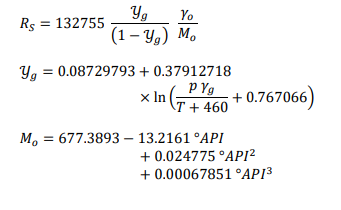

# original paper equation for Rs

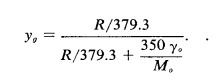

In [49]:
lasater_1958 = []
a1 = 725.32143
a2 = 16.03333
a3 = 0.09524
for i in range(len(df_corr)):
    Mo = 677.3893 - 13.2161*(df_corr['API_60'][i]) + 0.024775*((df_corr['API_60'][i])**2) + 0.00067851 * ((df_corr['API_60'][i])**3)
    Yg = 0.08729793 + 0.37912718* (np.log(((df_corr['p'][i])*(df_corr['gas_spgr'][i])/(df_corr['Temp_F'][i] +460))+0.767066))
    Rs_lasa = ((132755*Yg*(df_corr['spgr_oil_60'][i]))/((1-Yg)*Mo))
    lasater_1958.append(Rs_lasa)
print(lasater_1958)
    

[331.50210983746115, 277.94439098873045, 230.39492010712405, 185.96999398536448, 145.14627263901315, 107.4672210553206, 71.07888153295742, 35.315552002231534, -4.55407931655425]


# 09 Macary and El-Batanoney (1992)

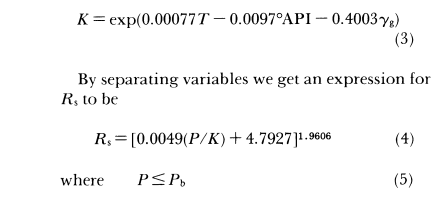

In [50]:
Macary_1992 = []
for i in range(len(df_corr)):
    K = np.exp(0.00077*(df_corr['Temp_F'][i]) - 0.0097 * (df_corr['API_60'][i]) - 0.4003 * (df_corr['gas_spgr'][i]))
    Rs_mac = (0.0049 * ((df_corr['p'][i])/K) + 4.7927)**1.9606
    Macary_1992.append(Rs_mac)
print(Macary_1992)

[286.505115180346, 233.41279514195898, 187.122896594382, 146.57911888795968, 111.76588366167684, 82.3383850912719, 57.69979470585518, 37.63497765948289, 21.594623100251102]


# 10 Mazandarani and Asghari (2007)

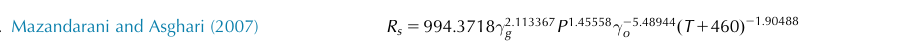

In [51]:
Mazandarani_2007 = []
for i in range(len(df_corr)):
    Rs_maza = 994.3718 * ((df_corr['gas_spgr'][i])**2.113367) * ((df_corr['p'][i])**1.45558) * ((df_corr['spgr_oil_60'][i])**(-5.48944)) * ((df_corr['Temp_F'][i] + 460)**(-1.90488))
    Mazandarani_2007.append(Rs_maza)
print(Mazandarani_2007)

[230.11216340834, 181.23232537400955, 140.48063229938353, 104.62066567546488, 74.24177187958131, 49.068483807374825, 27.918575774519162, 11.262681283228344, 0.0]


# 11 Petrosky and Farshad (1993)

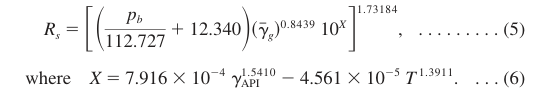

In [52]:
Petrosky_1993 = []
for i in range(len(df_test_corr)):
    x = (7.916*(10**(-4)))* ((df_test_corr['API_60'][i])**(1.5410)) - (4.561)*(10**(-5)) *((df_test_corr["Temp_F"][i]))**1.39
    ptrsky = ((((df_test_corr["p"][i])/112.727)+12.340)*((df_test_corr["Gas_spgr"][i])**0.8439)*(10**x))**1.73184
    Petrosky_1993.append(ptrsky)
print(Petrosky_1993)    

[312.57688502020727, 264.96538506107765, 224.9315752940021, 189.11129757943033, 158.45153760552031, 133.10114335562182, 111.52970147561281, 96.10642257651035, 108.9850538496616]


# 12 Standing (1981)

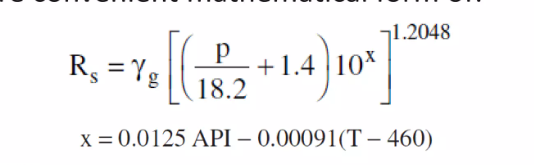

In [53]:
Standings_1981 = []
for i in range(len(df_test_corr)):
    std = df_test_corr['Gas_spgr'][i]*((((df_test_corr["p"][i])/18.2)+1.4)*10**((0.0125*df_test_corr['API_60'][i])-0.00091*df_test_corr['Temp_F'][i]))**1.2048
    Standings_1981.append(std)
print(Standings_1981)    

[389.02460806931947, 317.99047015438407, 255.5088792335027, 198.58519192734357, 148.17179527016066, 104.06395948594103, 64.81413856752539, 30.859871966013888, 2.7472692187084387]


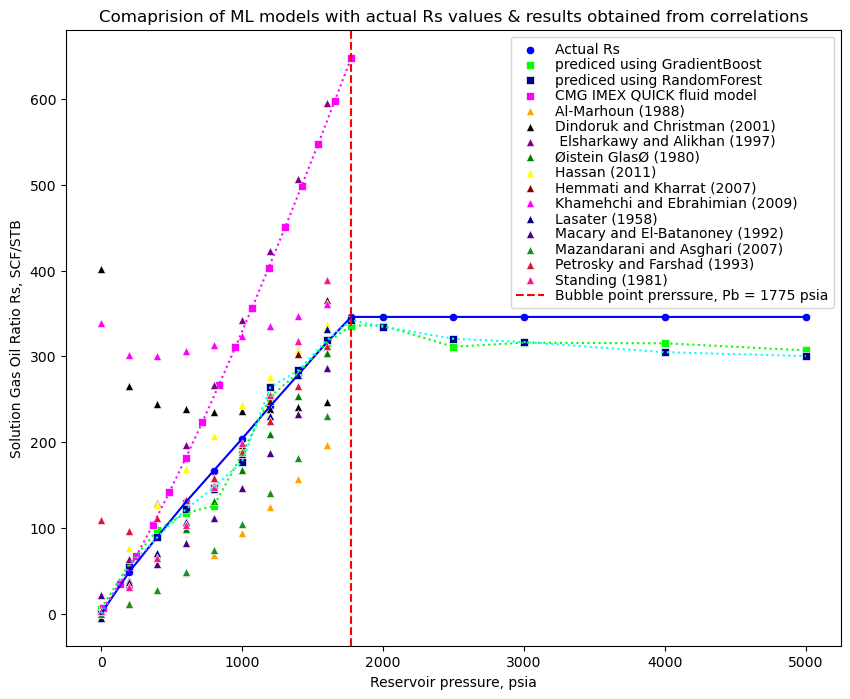

In [184]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_test_data['p'],y = df_test_data['Rs'], label = "Actual Rs", color = 'blue')
sns.scatterplot(x = df_test_data['p'],y = y_pred4_unseen,label = "prediced using GradientBoost", color = 'lime', marker = "s")
sns.scatterplot(x = df_test_data['p'],y = y_pred2_unseen,label = "prediced using RandomForest", color = 'darkblue', marker = "s")
sns.scatterplot(x = df_cmg['P_psi'],y = df_cmg['Rs_ft3/bbl'], color = "magenta", label = "CMG IMEX QUICK fluid model", marker = "s")

marker_corr = "^"

sns.scatterplot(x = df_test_corr['p'], y = marhoun, label ="Al-Marhoun (1988)", 
                color = 'orange', marker = marker_corr) #1 

sns.scatterplot(x = df_test_corr['p'], y = dindoruk_2001, label ="Dindoruk and Christman (2001)", 
                color = 'black', marker = marker_corr) #2

sns.scatterplot(x = df_test_corr['p'], y = elsharkawy_1997, label =" Elsharkawy and Alikhan (1997)", 
                color = 'purple',  marker = marker_corr) #3

sns.scatterplot(x = df_test_corr['p'],y = glaso_1980, label ="Øistein GlasØ (1980)", 
                color = 'green',marker = marker_corr) #4

sns.scatterplot(x = df_test_corr['p'],y = hassan_2011, label ="Hassan (2011)", 
                color = 'yellow', marker = marker_corr) #5

sns.scatterplot(x = df_test_corr['p'], y = hemma_2007, label ="Hemmati and Kharrat (2007)", 
                color = 'maroon', marker = marker_corr) #6

sns.scatterplot(x = df_test_corr['p'],y =  khamehchi_2009, label ="Khamehchi and Ebrahimian (2009)",
            color = 'magenta', marker = marker_corr) #7

sns.scatterplot(x = df_test_corr['p'],y = lasater_1958, label ="Lasater (1958)",
                color = 'navy', marker = marker_corr) #8

sns.scatterplot(x = df_test_corr['p'],y = Macary_1992, label ="Macary and El-Batanoney (1992)",
                color = 'indigo', marker = marker_corr) #9

sns.scatterplot(x = df_test_corr['p'], y = Mazandarani_2007, label ="Mazandarani and Asghari (2007)",
                color = 'forestgreen', marker = marker_corr) #10

sns.scatterplot(x = df_test_corr['p'], y = Petrosky_1993, label ="Petrosky and Farshad (1993)",
                color = 'crimson', marker = marker_corr) #11

sns.scatterplot(x = df_test_corr['p'], y = Standings_1981, label ="Standing (1981)",
                color = 'deeppink', marker = marker_corr) #12

sns.lineplot(x = df_test_data['p'],y = df_test_data['Rs'], color = 'blue')
sns.lineplot(x = df_test_data['p'],y=y_pred4_unseen, color = 'lime' , linestyle = ":")
sns.lineplot(x = df_test_data['p'],y=y_pred2_unseen, color = 'cyan' , linestyle = ":")
plt.plot(df_cmg['P_psi'],df_cmg['Rs_ft3/bbl'], color = "magenta", linestyle = ":")
plt.axvline(1775,linestyle = "--", color ="red", label = "Bubble point prerssure, Pb = 1775 psia")

plt.xlabel('Reservoir pressure, psia')
plt.ylabel("Solution Gas Oil Ratio Rs, SCF/STB")
plt.title('Comaprision of ML models with actual Rs values & results obtained from correlations')

plt.legend(loc = 0, mode= None, labelspacing = 0.1)
plt.savefig('Sol GOR result with CMG.png', dpi = 1200,  bbox_inches='tight')
plt.show()

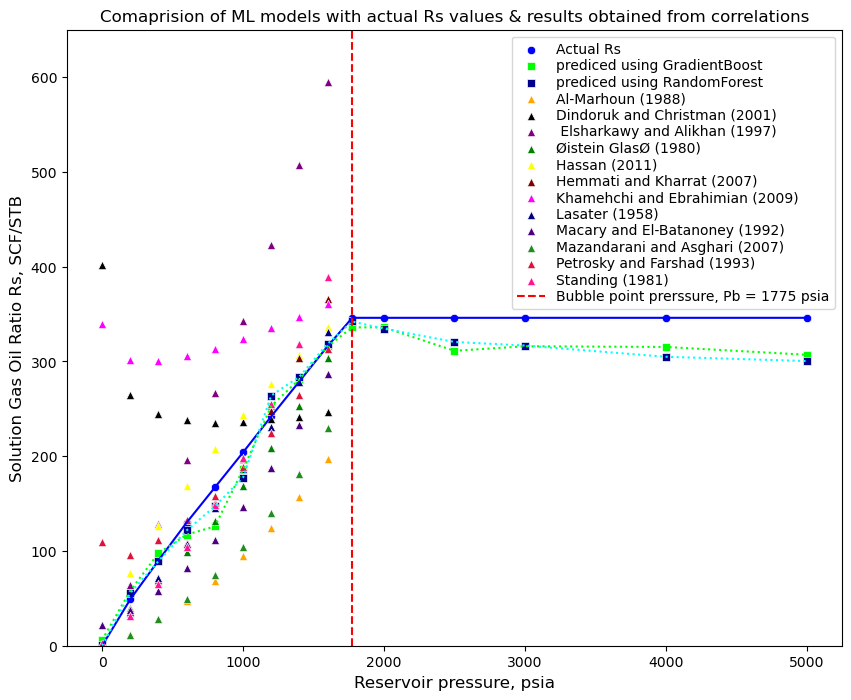

In [147]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_test_data['p'],y = df_test_data['Rs'], label = "Actual Rs", color = 'blue')
sns.scatterplot(x = df_test_data['p'],y = y_pred4_unseen,label = "prediced using GradientBoost", color = 'lime', marker = "s")
sns.scatterplot(x = df_test_data['p'],y = y_pred2_unseen,label = "prediced using RandomForest", color = 'darkblue', marker = "s")
#sns.scatterplot(x = df_cmg['P_psi'],y = df_cmg['Rs_ft3/bbl'], color = "magenta", label = "CMG IMEX QUICK fluid model", marker = "s")

marker_corr = "^"

sns.scatterplot(x = df_test_corr['p'], y = marhoun, label ="Al-Marhoun (1988)", 
                color = 'orange', marker = marker_corr) #1 

sns.scatterplot(x = df_test_corr['p'], y = dindoruk_2001, label ="Dindoruk and Christman (2001)", 
                color = 'black', marker = marker_corr) #2

sns.scatterplot(x = df_test_corr['p'], y = elsharkawy_1997, label =" Elsharkawy and Alikhan (1997)", 
                color = 'purple',  marker = marker_corr) #3

sns.scatterplot(x = df_test_corr['p'],y = glaso_1980, label ="Øistein GlasØ (1980)", 
                color = 'green',marker = marker_corr) #4

sns.scatterplot(x = df_test_corr['p'],y = hassan_2011, label ="Hassan (2011)", 
                color = 'yellow', marker = marker_corr) #5

sns.scatterplot(x = df_test_corr['p'], y = hemma_2007, label ="Hemmati and Kharrat (2007)", 
                color = 'maroon', marker = marker_corr) #6

sns.scatterplot(x = df_test_corr['p'],y =  khamehchi_2009, label ="Khamehchi and Ebrahimian (2009)",
            color = 'magenta', marker = marker_corr) #7

sns.scatterplot(x = df_test_corr['p'],y = lasater_1958, label ="Lasater (1958)",
                color = 'navy', marker = marker_corr) #8

sns.scatterplot(x = df_test_corr['p'],y = Macary_1992, label ="Macary and El-Batanoney (1992)",
                color = 'indigo', marker = marker_corr) #9

sns.scatterplot(x = df_test_corr['p'], y = Mazandarani_2007, label ="Mazandarani and Asghari (2007)",
                color = 'forestgreen', marker = marker_corr) #10

sns.scatterplot(x = df_test_corr['p'], y = Petrosky_1993, label ="Petrosky and Farshad (1993)",
                color = 'crimson', marker = marker_corr) #11

sns.scatterplot(x = df_test_corr['p'], y = Standings_1981, label ="Standing (1981)",
                color = 'deeppink', marker = marker_corr) #12

sns.lineplot(x = df_test_data['p'],y = df_test_data['Rs'], color = 'blue')
sns.lineplot(x = df_test_data['p'],y=y_pred4_unseen, color = 'lime' , linestyle = ":")
sns.lineplot(x = df_test_data['p'],y=y_pred2_unseen, color = 'cyan' , linestyle = ":")
#plt.plot(df_cmg['P_psi'],df_cmg['Rs_ft3/bbl'], color = "black", linestyle = ":")
plt.axvline(1775,linestyle = "--", color ="red", label = "Bubble point prerssure, Pb = 1775 psia")

plt.xlabel('Reservoir pressure, psia',fontsize =12)
plt.ylabel("Solution Gas Oil Ratio Rs, SCF/STB",fontsize =12)
plt.title('Comaprision of ML models with actual Rs values & results obtained from correlations')
plt.ylim(0,650)
plt.legend(loc = 0, mode= None, labelspacing = 0.18)
plt.savefig('Sol GOR result.png', dpi = 1200,  bbox_inches='tight')
plt.show()